In [ ]:
# Exercice: Régression multiple sur Ventes d'ordinateurs, Taux de pollution et Allergies

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Importation de la base de données

In [2]:
df = pd.read_excel ('/Users/louis_mora/Documents/IA_School/IAS_M1_S2/IAS_M1_Régression/df_regression.xlsx')
df

,Année,Nbre PC (xi),Taux de pollution (zi),Patients (yi)
0,2009,770,35,6150
1,2010,1290,45,7180
2,2011,1980,50,8270
3,2012,2550,55,8810
4,2013,3650,60,9500
5,2014,4480,65,10360
6,2015,5530,70,11450


In [ ]:
# REPRÉSENTATION GRAPHIQUE

# Représenter le nuage de points (xi, yi) et (zi, yi) dans un espace bidimensionnel ou (xi, zi, yi) en 3D et
# interpréter la distribution des données

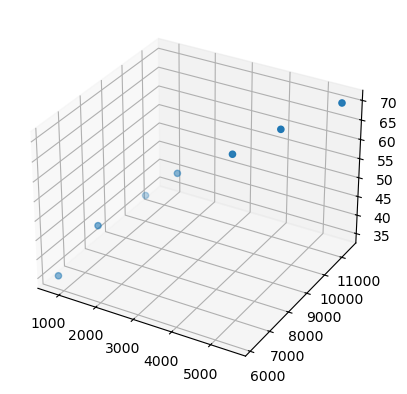

In [39]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

# Notre jeu de données
x = df["Nbre PC (xi)"]
z = df["Taux de pollution (zi)"]
y = df["Patients (yi)"]

# Créer un objet Axes3D pour le graphique 3D
plt.figure("Exemple 3D")
axes = plt.axes(projection="3d")

# On affiche notre nuage de points en 3D
axes.scatter(x, y, z)
plt.show()

In [ ]:
# Représenter le nuage de pont

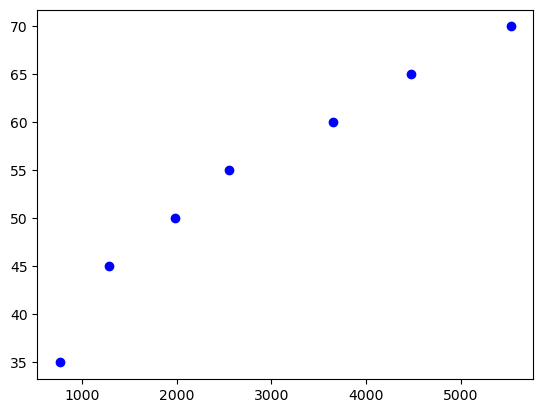

In [20]:
plt.plot(x,y,"ob"); # ob = type de points "o" ronds, "b" bleus

In [ ]:
# Représenter le nuage de points (zi, yi)

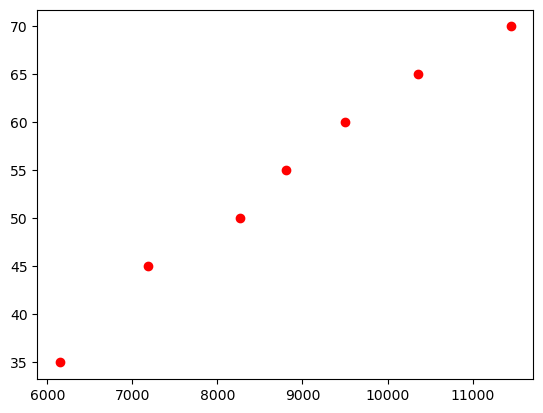

In [22]:
plt.plot(z,y,"or"); # ob = type de points "o" ronds, "b" bleus

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

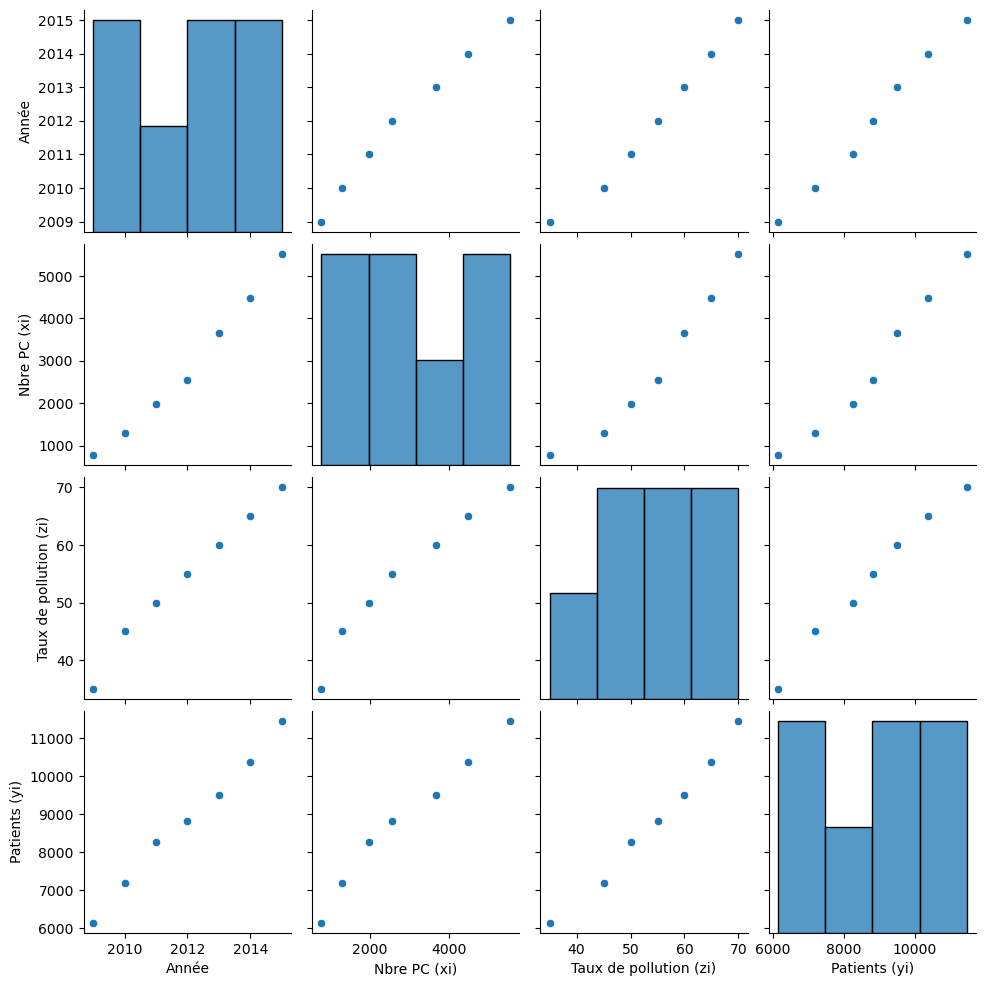

In [40]:
import seaborn as sb
sb.pairplot(df)

In [ ]:
# ANALYSE DESCRIPTIVE

# Calculer la moyenne et la variance pour chaque variable (xi, zi, yi) et interpréter ces statistiques
# descriptives

In [12]:
df.mean()

Année                     2012.000000
Nbre PC (xi)              2892.857143
Taux de pollution (zi)      54.285714
Patients (yi)             8817.142857
dtype: float64

In [13]:
df.var()

Année                     4.666667e+00
Nbre PC (xi)              3.012224e+06
Taux de pollution (zi)    1.452381e+02
Patients (yi)             3.311990e+06
dtype: float64

In [ ]:
# COVARIANCE ET CORRÉLATION

In [26]:
# Calculer la covariance entre chaque paire de variables
df.cov()

,Année,Nbre PC (xi),Taux de pollution (zi),Patients (yi)
Année,4.666667,3.721667e+03,25.833333,3.915000e+03
Nbre PC (xi),3721.666667,3.012224e+06,20377.380952,3.116160e+06
Taux de pollution (zi),25.833333,2.037738e+04,145.238095,2.179762e+04
Patients (yi),3915.000000,3.116160e+06,21797.619048,3.311990e+06


In [27]:
# Calculer les coefficients de corrélation linéaire entre chaque paire de variables et interpréter leur
# signification
df.corr()

,Année,Nbre PC (xi),Taux de pollution (zi),Patients (yi)
Année,1.000000,0.992637,0.992286,0.995827
Nbre PC (xi),0.992637,1.000000,0.974237,0.986578
Taux de pollution (zi),0.992286,0.974237,1.000000,0.993858
Patients (yi),0.995827,0.986578,0.993858,1.000000


In [ ]:
# MODÉLISATION STATISTIQUE

# Construire un modèle de régression multiple avec xi (ventes de PC) et zi (taux de pollution) comme
# variables explicatives et yi (nombre de patients) comme variable à expliquer

In [37]:
# Diviser les données en variables explicatives (xi, zi) et variable à expliquer (yi)
xz = df[['Nbre PC (xi)', 'Taux de pollution (zi)']]
y = df['Patients (yi)']

# Ajouter une constante à X pour estimer l'interception
xz = sm.add_constant(xz)

# Créer le modèle de régression
# sm = model statistic (API Machine Learning)
# OLS = SEM = minimiser la somme de toutes les erreurs élevé au carré
model = sm.OLS(y, xz)

# Ajuster le modèle aux données
results = model.fit()

# Afficher les résultats de la régression
print(results.summary())

# Dep. Variable = variable dépendante (target, variable à prédire)
# Variables indépendantes: xi, zi
# No. Observations : nombre lignes df
# Df = degrees of freedom / Df. Residuals = n-k-1
# Df. Model = nombre de variables explicatives
# Covariance Type : interprétation de la corrélation (ici, variables trop corrélées)
# R-Squared : modèle juste à 99,4%
# Adj. R-squared : modèle juste à 99,2%
# F-statistic = 352.3 / n = 7 (nbr observations) / k = 2 / n-k-1 = 7-2-1 = 4 / consulter table Fisher, si résultat de la table
# inférieur à F-statistic alors modèle juste
# Prob (F-statistic): Si inférieur 5% > significatif
# modèle: y = 2454.3898 + 0.3778*Nbre PC + 97.0761*Taux de pollution
# Est-ce que la constante est significatif? Constante = 2454,3898 > Regarder l'intervalle de confiance > ici, 0 n'appartient pas
# à l'intervalle donc la constante est significative (le modèle a besoin de la constante)
# Nbre PC n'est pas significatif, Nbre PC et Taux de pollution sont trop corrélés

                            OLS Regression Results                            
Dep. Variable:          Patients (yi)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     352.3
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           3.19e-05
Time:                        11:10:53   Log-Likelihood:                -43.819
No. Observations:                   7   AIC:                             93.64
Df Residuals:                       4   BIC:                             93.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2454

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [38]:
# Afficher les noms des colonnes
df.columns

Index(['Année', 'Nbre PC (xi)', 'Taux de pollution (zi)', 'Patients (yi)'], dtype='object')

In [ ]:
# INTERPRETATION DES COEFFICIENTS

# Interpréter les coefficients obtenus du modèle de régression multiple

# modèle: y = ...
# précision: ...
# Est-ce que le modèle est significatif?
# Est-ce que les coefficients sont significatifs?
# Prévisions: ...

# cf. au-dessus du modèle

In [ ]:
# PRÉDICTION

# Utiliser le modèle pour prédire le nombre de patients traités pour des allergies si 6000 PC sont
# vendus et le taux de pollution est de 75

In [44]:
predictions = results.get_prediction(xz).summary_frame(0.05) # Prédiction avec un intervalle de confiance à 95%
predictions["reality"]=y

In [45]:
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,reality
0,6142.956160,162.298819,5692.342398,6593.569922,5495.496735,6790.415585,6150
1,7310.170682,97.602143,7039.183689,7581.157675,6772.039755,7848.301609,7180
2,8056.229685,86.934311,7814.861343,8297.598027,7532.388467,8580.070903,8270
3,8756.953318,100.051349,8479.166241,9034.740395,8215.366202,9298.540435,8810
4,9657.908169,71.533577,9459.299120,9856.517217,9152.342645,10163.473693,9500
5,10456.858437,88.961828,10209.860805,10703.856068,9930.399725,10983.317148,10360
6,11338.923549,132.868326,10970.021935,11707.825163,10745.425996,11932.421102,11450


In [ ]:
# Interprétation

# Pour ligne 0: Le modèle a prédit 6142 patients à +- 162 patients près
# La valeur prédite se trouve à 95% entre mean_ci_lower et mean_ci_upper

In [55]:
# Création d'un nouvel objet (dataframe)
# car ne fonctionne pas avec les Listes
new=pd.DataFrame([1,6000,75]).T
new

,0,1,2
0,1,6000,75


In [54]:
predictions = results.get_prediction(new).summary_frame(0.05) # Prédiction avec un intervalle de confiance à 95%
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12001.867708,137.996262,11618.728661,12385.006754,11399.417317,12604.318099
